## Decision Tree Classification

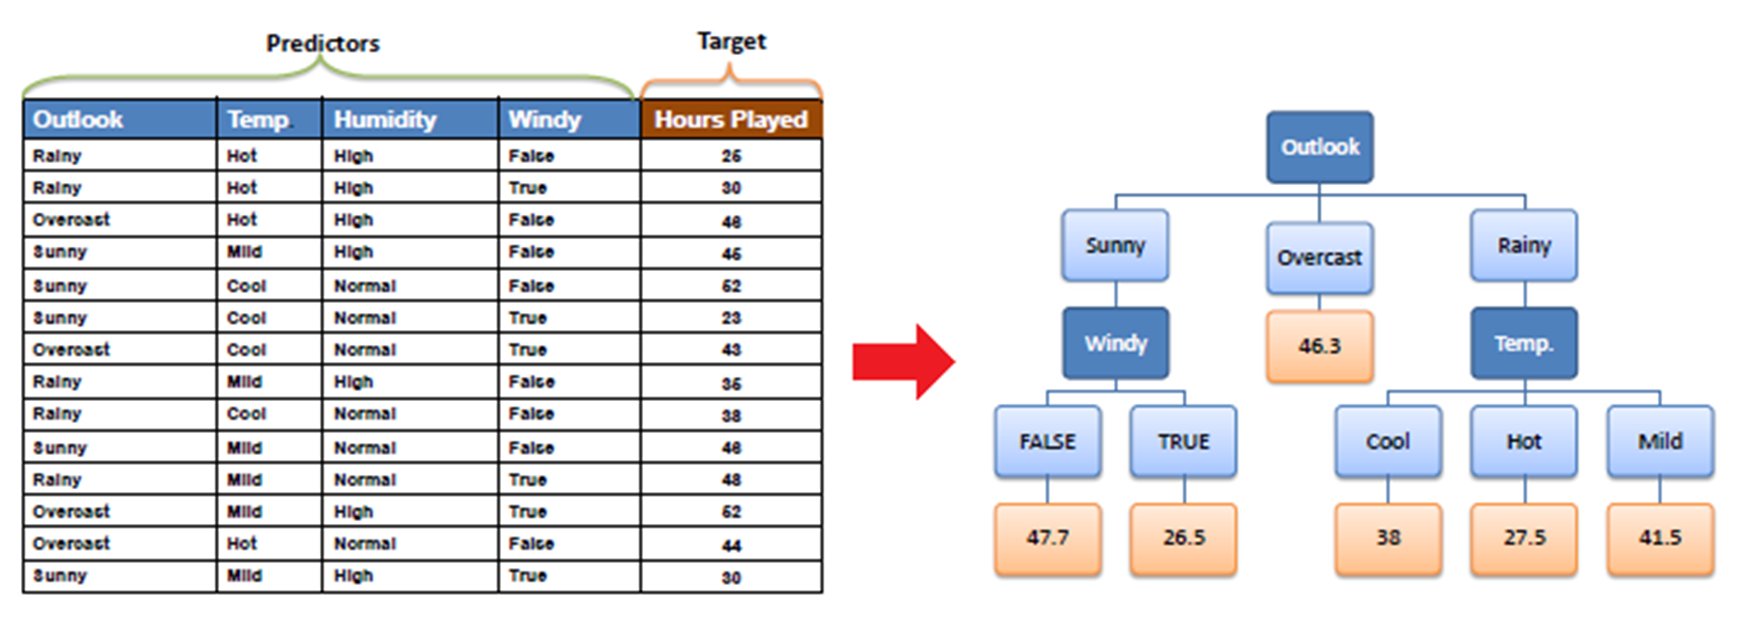

In [4]:
from warnings import filterwarnings
filterwarnings("ignore")

## Step 1- Data Ingestion

In [5]:
import pandas as pd
df=pd.read_csv("PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Features
1.AT - Atmospheric Tempreature degree celsius
2.V - Vaccum Pressure Pa
3.AP - Atmospheric Pressure Pa
4.RH - Relative Humidity %
5.PE - Energy output of plant in Mega Watts
6.PE is Target feature which is numeric in nature

## Step 2- Perform Basic Data Quality Checks

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [7]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(41)

In [9]:
# Drop the duplicated
df=df.drop_duplicates(keep="first").reset_index(drop=True)

In [10]:
df.shape

(9527, 5)

## Seperate X and Y(PE)

In [11]:
X=df.drop(columns=["PE"])
Y=df[["PE"]]

In [12]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [13]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Sytep 4- Apply Preprocessing on X

In [14]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:
num_pipe=make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")

In [17]:
X_pre=num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## Step 5- Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=42)


In [19]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [20]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [21]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [22]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [23]:
xtrain.shape

(7621, 4)

In [24]:
xtest.shape

(1906, 4)

## Step 6- Build the decision tree

In [25]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor(
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="squared_error"
)
model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=5, min_samples_split=5)

In [26]:
model.score(xtrain,ytrain)

0.71765957297802

In [27]:
model.score(xtest,ytest)

0.7251450398190279

## Hyperparameter tuning

In [28]:
params={
    "max_depth":[2,3,4,5,6,7,8,9,10,11],
    "min_samples_split":[5,6,7,8,9],
    "min_samples_leaf":[5,6,7,8,9],
    "criterion":["squared_error","absolute_error"]
}

In [29]:
9*5*5*2

450

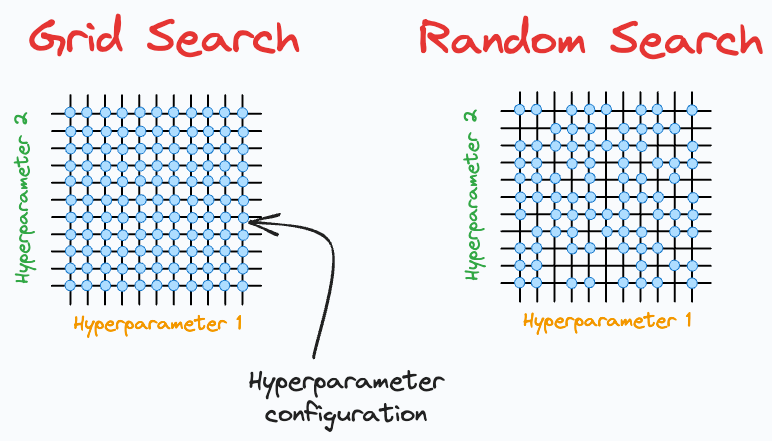

In [30]:
from     sklearn.model_selection import RandomizedSearchCV

In [32]:
base_model= DecisionTreeRegressor()

rscv=RandomizedSearchCV(base_model,param_distributions=params,cv=5,scoring="neg_root_mean_squared_error")

rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11],
                                        'min_samples_leaf': [5, 6, 7, 8, 9],
                                        'min_samples_split': [5, 6, 7, 8, 9]},
                   scoring='neg_root_mean_squared_error')

In [33]:
rscv.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 5,
 'max_depth': 8,
 'criterion': 'absolute_error'}

In [34]:
rscv.best_score_

np.float64(-4.154759604192179)

In [36]:
best_dtr=rscv.best_estimator_
best_dtr

DecisionTreeRegressor(criterion='absolute_error', max_depth=8,
                      min_samples_leaf=5, min_samples_split=7)

## Evaluate Model

In [37]:
best_dtr.score(xtrain,ytrain)

0.9511160965256591

In [38]:
best_dtr.score(xtest,ytest)

0.9439758703113174

In [39]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(best_dtr,xtrain,ytrain,cv=5,scoring="r2")

scores

array([0.94158375, 0.9394911 , 0.93687386, 0.94096634, 0.94019587])

In [40]:
scores.mean()

np.float64(0.9398221828539655)

In [41]:
scores2=cross_val_score(best_dtr,xtrain,ytrain,cv=5,scoring="neg_mean_squared_error")

scores2

array([-16.2124849 , -17.42168622, -17.79983556, -17.22234939,
       -17.50897918])

In [42]:
scores2.mean()

np.float64(-17.233067052506346)

In [43]:
from  sklearn.metrics import(
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [44]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [45]:
print("Training Results")
evaluate_model(best_dtr,xtrain,ytrain)

Training Results
RMSE : 3.75
MAE : 2.63
MAPE : 0.58%
R2 : 95.11%


In [46]:
print("Testing Results")
evaluate_model(best_dtr,xtest,ytest)

Testing Results
RMSE : 4.11
MAE : 3.04
MAPE : 0.67%
R2 : 94.40%


## Above has r2 score > 0.8 hence it can be used out of sample prediction
## Plot the tree

In [47]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

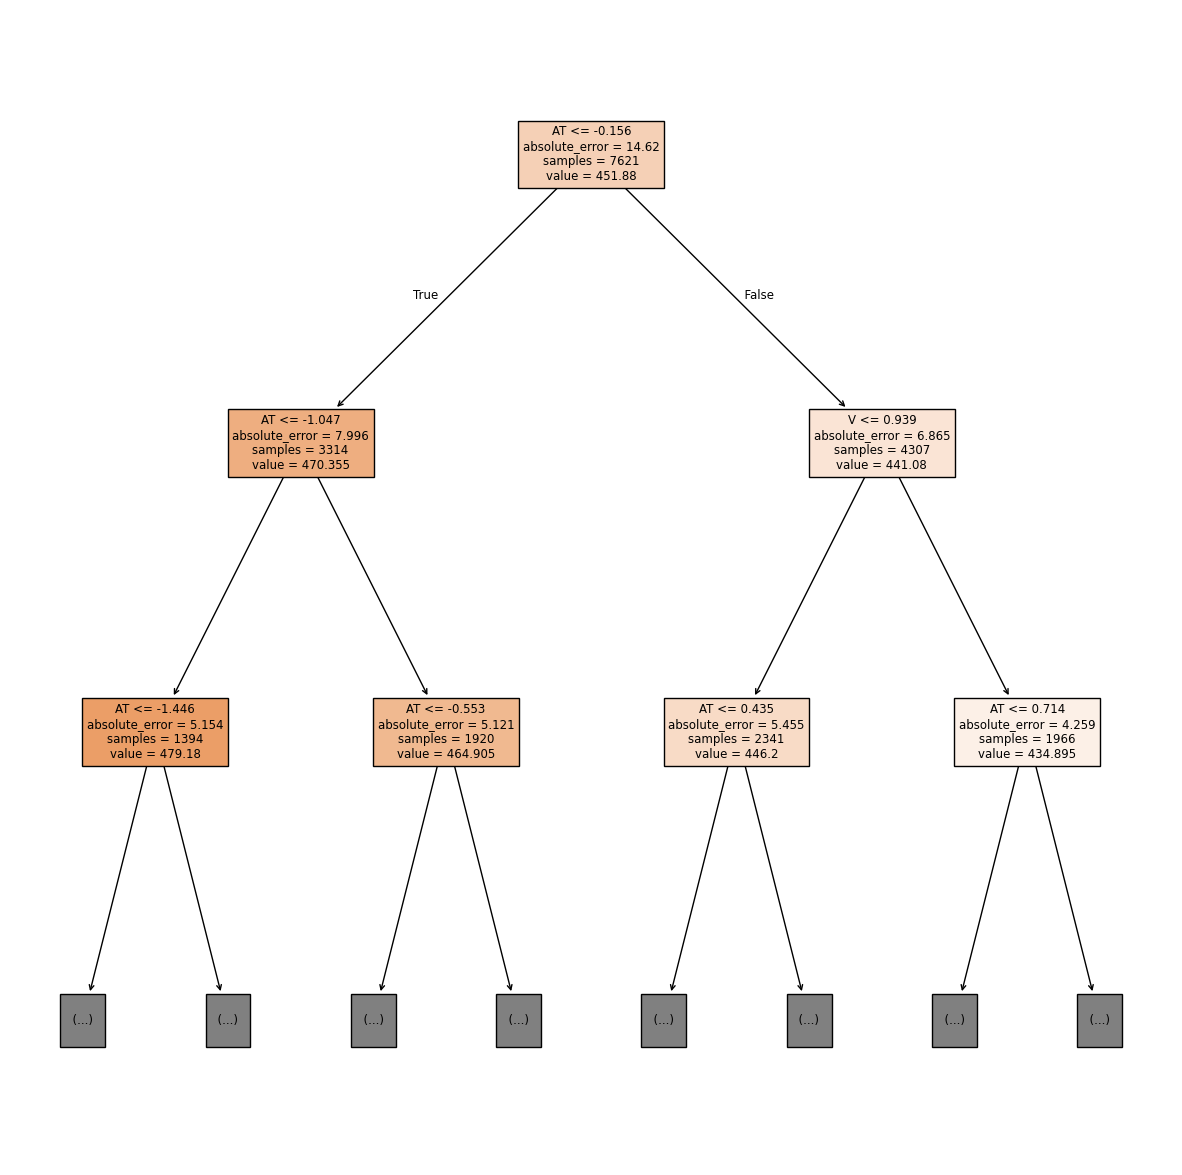

In [48]:
plt.figure(figsize=(15,15))
plot_tree(best_dtr,feature_names=xtrain.columns,max_depth=2,filled=True)
plt.show()

In [49]:
best_dtr.feature_importances_

array([0.8309029 , 0.13362484, 0.01746545, 0.01800681])

In [50]:
xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [51]:
imp=pd.Series(best_dtr.feature_importances_,index=xtrain.columns)
imp

AT    0.830903
V     0.133625
AP    0.017465
RH    0.018007
dtype: float64

In [52]:
imp.sort_values(ascending=False)

AT    0.830903
V     0.133625
RH    0.018007
AP    0.017465
dtype: float64

<Axes: >

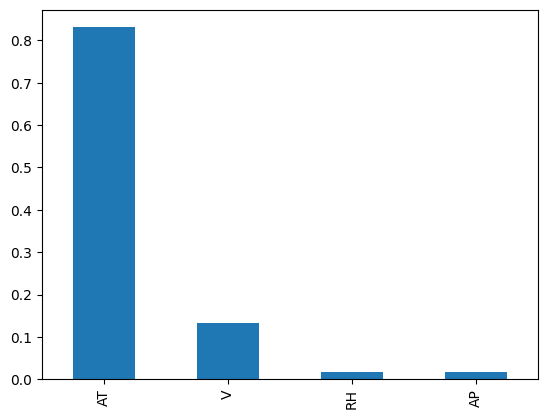

In [53]:
imp.sort_values(ascending=False).plot(kind="bar")

## Step 8- Out of sample prediction

In [57]:
xnew =pd.read_csv("PowerPlantTest.csv")
xnew

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [58]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [59]:
xnew_pre =  num_pipe.transform(xnew)
xnew_pre

,AT,V,AP,RH
0,0.717594,-0.220203,-2.211551,-1.118316
1,1.657948,-1.047911,6.373998,0.456299
2,1.120603,0.000000,-0.511275,0.000000


In [60]:
preds=best_dtr.predict(xnew_pre)
preds

array([447.04 , 434.09 , 441.015])

In [61]:
xnew["PE"]=preds
xnew

,AT,V,AP,RH,PE
0,25,51.5,1000.1,57.0,447.040
1,32,41.0,1051.1,80.0,434.090
2,28,NaN,1010.2,NaN,441.015


In [62]:
xnew=xnew.round(2)

In [63]:
xnew

,AT,V,AP,RH,PE
0,25,51.5,1000.1,57.0,447.04
1,32,41.0,1051.1,80.0,434.09
2,28,NaN,1010.2,NaN,441.02


In [64]:
xnew.to_csv("results.csv",index=False)

## Save the model and preprocessor in joblib format

In [65]:
import joblib

joblib.dump(num_pipe,"pre.joblib")

['pre.joblib']

In [66]:
joblib.dump(best_dtr,"PowerModel.joblib")

['PowerModel.joblib']

## Load the models

In [67]:
p=joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [68]:
m=joblib.load("PowerModel.joblib")
m

DecisionTreeRegressor(criterion='absolute_error', max_depth=8,
                      min_samples_leaf=5, min_samples_split=7)